In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5407, 10)

In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
3247,ham,Sac will score big hundred.he is set batsman:-)
5376,ham,Yeah it's jus rite...
678,ham,FALSE
3853,ham,So i could kiss and feel you next to me...
3861,ham,I was just callin to say hi. Take care bruv!


In [7]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2387,ham,"Rose needs water, season needs change, poet ne..."
2816,ham,K...k...yesterday i was in cbe .
2787,ham,He says hi and to get your ass back to south t...
841,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...
2483,ham,"Some friends want me to drive em someplace, pr..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

809

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(4598, 2)

# 2.EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4171
1     427
Name: target, dtype: int64

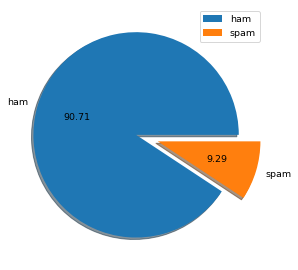

In [18]:
plt.figure(figsize=(5,5),dpi=68)
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f",explode=[0,0.22],
       shadow = True)
plt.legend()
plt.show()

In [19]:
#Data is imbalanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4598.000000,4598.000000,4598.000000
mean,77.593301,18.419965,1.934102
std,64.069986,15.455523,1.460750
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,57.000000,14.000000,1.000000
75%,109.000000,25.000000,2.000000
max,1146.000000,331.000000,38.000000


In [29]:
#Now we analyze ham and spam differently
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4171.000000,4171.000000,4171.000000
mean,71.775833,17.515704,1.839847
std,63.277527,15.649700,1.433165
min,2.000000,1.000000,1.000000
25%,33.500000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,1146.000000,331.000000,38.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,427.000000,427.000000,427.000000
mean,134.419204,27.252927,2.854801
std,39.170566,9.700526,1.408390
min,5.000000,1.000000,1.000000
25%,124.000000,23.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,545.000000,145.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

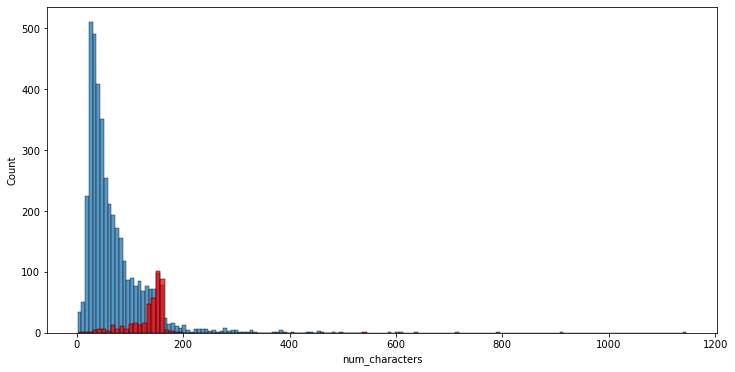

In [31]:
plt.figure(figsize=[12,6])
#ham
sns.histplot(df[df['target'] == 0]['num_characters'])
#spam
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

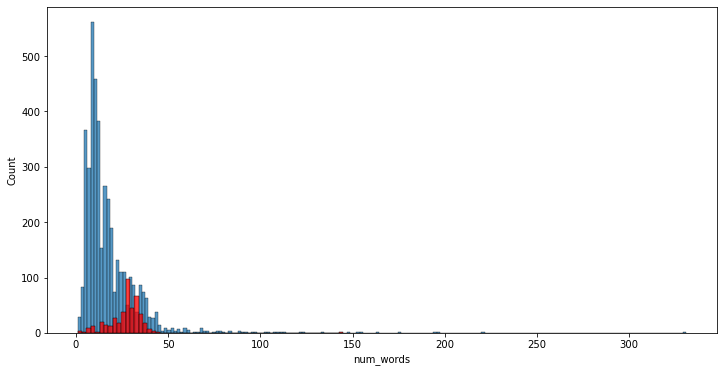

In [32]:
plt.figure(figsize=[12,6])
#ham
sns.histplot(df[df['target'] == 0]['num_words'])
#spam
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

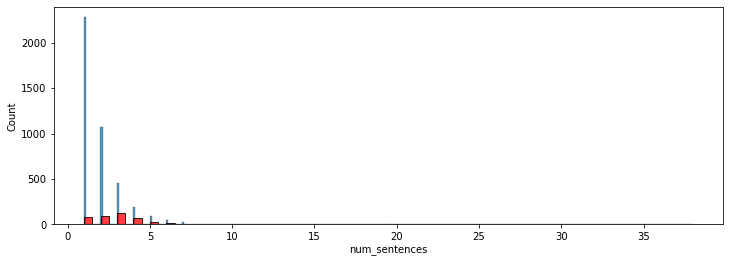

In [33]:
plt.figure(figsize=[12,4])
#ham
sns.histplot(df[df['target'] == 0]['num_sentences'])
#spam
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

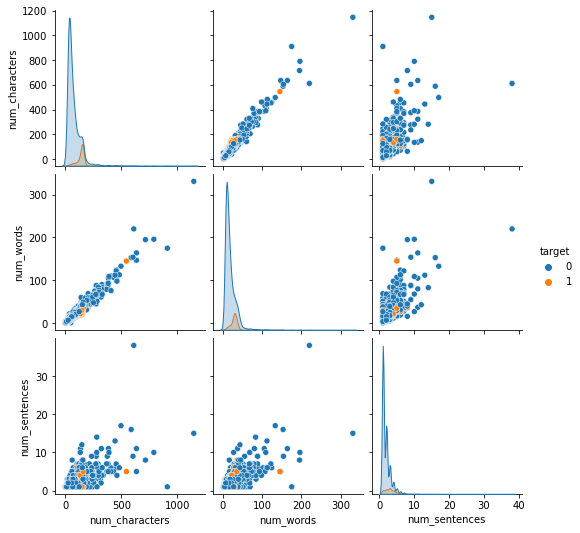

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

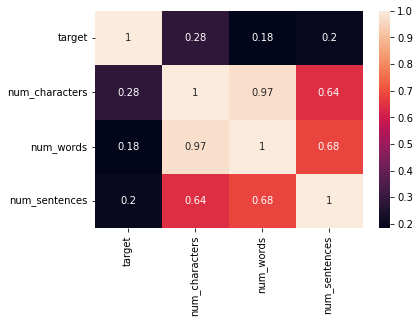

In [35]:
sns.heatmap(df.corr(),annot = True)

In [36]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.283813,0.182879,0.201689
num_characters,0.283813,1.000000,0.972113,0.640060
num_words,0.182879,0.972113,1.000000,0.683850
num_sentences,0.201689,0.640060,0.683850,1.000000


## 3. Data Preprocessing
 * Lower case
 * Tokenization
 * Removing Special Characters
 * Removing stop words and punctuation
 * Stemming

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#All Liabrary
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #text = y(Never copy the list like this)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return "  ".join(y)   

In [40]:
transform_text('Even my brother is not like to speak with me. They treat me like aids patent.')

'even  brother  like  speak  treat  like  aid  patent'

In [41]:
df['text'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Wordcloud of ham and spam

In [44]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

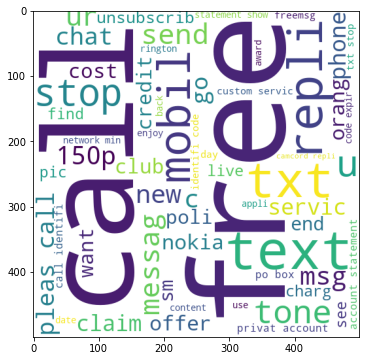

In [46]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep= " "))

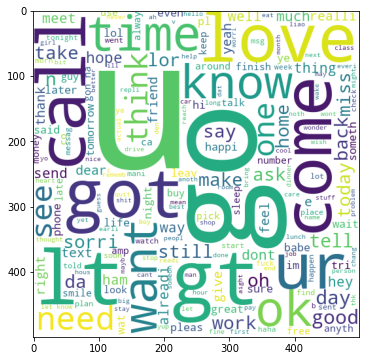

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head(4)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [50]:
#most used word
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

6496

C:\Users\91620\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


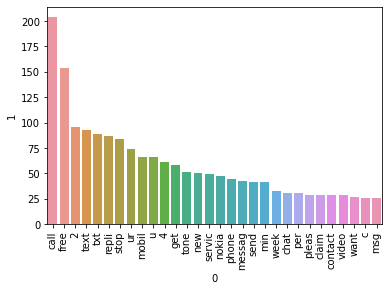

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = '90')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [54]:
len(ham_corpus)

33106

C:\Users\91620\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


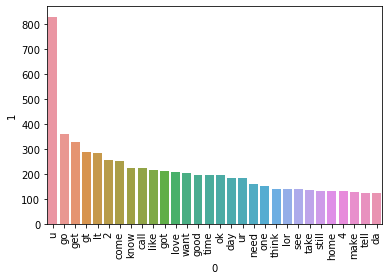

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='90')
plt.show()

In [56]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building  

In [57]:
#here input = Transformed _text and output = target, output is in muerical valur but input is not
#so we convert transformed text into num value.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [58]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(4598, 6066)

4598 msg and 6066 words

In [62]:
y = df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

X = transformed_text(input),  y = target(output)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8717391304347826
[[747 100]
 [ 18  55]]
0.3548387096774194


Accuracy_score = 87%

Confusion_matrix = [[747 100]
                    [ 18  55]]

precision_score = 35% (very poor)

In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9782608695652174
[[835  12]
 [  8  65]]
0.8441558441558441


Accuracy_score = 97%

Confusion_matrix = [[835 12]
                    [ 8  65]]

precision_score = 84% (very good)

In [74]:
#Bernoulli Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9684782608695652
[[842   5]
 [ 24  49]]
0.9074074074074074


Accuracy_score = 96%

Confusion_matrix = [[842 5] [ 24 49]]

precision_score = 90% (Awsome)

### TFIDF 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()

In [76]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(4598, 6066)

4598= msg,6066=words

In [78]:
y = df['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [83]:
mnb = MultinomialNB()

In [84]:
#keep tfidf with mnb
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9576086956521739
[[847   0]
 [ 39  34]]
1.0


Accuracy_score = 95%

Confusion_matrix = [[847 0] [ 39 34]]

precision_score = 100% (Fantastic) There is zero false positive. 
There is no email classified which is not spam and this tell that it is spam

In [85]:
# tfidf --> MNB

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9728260869565217, 0.98)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9728260869565217
Precision -  0.98
For  KN
Accuracy -  0.9347826086956522
Precision -  1.0
For  NB
Accuracy -  0.9576086956521739
Precision -  1.0
For  DT
Accuracy -  0.95
Precision -  0.7872340425531915
For  LR
Accuracy -  0.9608695652173913
Precision -  0.9111111111111111
For  RF
Accuracy -  0.9684782608695652
Precision -  0.9782608695652174
For  AdaBoost
Accuracy -  0.9630434782608696
Precision -  0.8545454545454545
For  BgC
Accuracy -  0.9706521739130435
Precision -  0.859375
For  ETC
Accuracy -  0.9739130434782609
Precision -  0.9803921568627451
For  GBDT
Accuracy -  0.9630434782608696
Precision -  0.975609756097561


C:\Users\91620\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:50:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9717391304347827
Precision -  0.9122807017543859


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [93]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.934783,1.000000
2,NB,0.957609,1.000000
8,ETC,0.973913,0.980392
0,SVC,0.972826,0.980000
5,RF,0.968478,0.978261
9,GBDT,0.963043,0.975610
10,xgb,0.971739,0.912281
4,LR,0.960870,0.911111
7,BgC,0.970652,0.859375
6,AdaBoost,0.963043,0.854545


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [99]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.934783
1,NB,Accuracy,0.957609
2,ETC,Accuracy,0.973913
3,SVC,Accuracy,0.972826
4,RF,Accuracy,0.968478
5,GBDT,Accuracy,0.963043
6,xgb,Accuracy,0.971739
7,LR,Accuracy,0.960870
8,BgC,Accuracy,0.970652
9,AdaBoost,Accuracy,0.963043


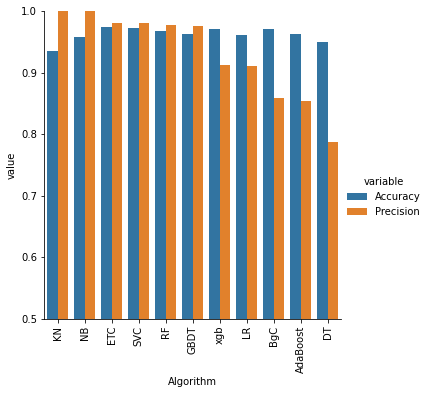

In [100]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()